# Automatic Term Recognition

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Save and Load

In [ ]:
import json
def save_list(filename, list_obj):
    # open output file for writing
    with open(filename, 'w') as filehandle:
        json.dump(list_obj, filehandle)
    filehandle.close

def load_list(filename):
    with open(filename, 'r') as filehandle:
        return json.load(filehandle)

## Download CAP dataset

In [ ]:
import os, shutil, requests, zipfile, time
corpus_dir = '/content/gdrive/My Drive/Thesis/data'
data_cache = './data/cache'
corpus_file = os.path.join(corpus_dir, 'Illinois-20200302-text/data/data.jsonl.xz')
corpus_data = os.path.join(corpus_dir, 'Illinois-20200302-text/data/')
data_text_file = os.path.join(corpus_dir, 'illinois_vb.txt')

In [ ]:
import os, shutil, requests, zipfile, time
#download if file doesn't exist
def download_data():
    if not os.path.isfile(corpus_file):
        if not os.path.exists(corpus_dir):
            os.makedirs(corpus_dir)

        corpus_zip = 'Illinois-20200302-text.zip'    
        download_url = 'https://api.case.law/v1/bulk/22341/download/'
        
        if not os.path.exists(data_cache):
            os.makedirs(data_cache)

        zipfilepath = os.path.join(data_cache, corpus_zip)

        if not os.path.isfile( zipfilepath ):
            response = requests.get(download_url, stream=True)
            with open(zipfilepath, 'wb') as out_file:
                shutil.copyfileobj(response.raw, out_file)

        if not os.path.isfile(corpus_file):
            with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
                zip_ref.extractall(corpus_dir)
        # Get rid of zipfilepath source (the required text file itself will remain)
        os.unlink(zipfilepath)
    return print("Corpus available locally")

#Download Illinois Data
download_data()

Corpus available locally


## Install NLTK  and other Libraries

In [ ]:
#updata NLTK library
!pip install -U -q nltk

     |████████████████████████████████| 1.4MB 1.7MB/s 


In [ ]:
#Download Required libraries
import nltk
print (nltk.__version__)
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize as wd, sent_tokenize, WhitespaceTokenizer #,RegexpTokenizer , TweetTokenizer,  WordPunctTokenizer
nltk.download('stopwords', quiet=True)
nltk.download('punkt',quiet=True)
nltk.download('averaged_perceptron_tagger',quiet=True)
#from nltk.stem import PorterStemmer
# from collections import Counter
#from num2words import num2words

3.5


True

### *(Not to Execute) Tokenizer Test*

In [ ]:
from nltk.tokenize import word_tokenize as wd, sent_tokenize, WhitespaceTokenizer ,RegexpTokenizer , TweetTokenizer,  WordPunctTokenizer
rt = RegexpTokenizer("[\w']+")
wt = WhitespaceTokenizer()
tt = TweetTokenizer()
wp = WordPunctTokenizer()
tokens=[]
text = "In Düsseldorf I took my hat off. But I can't put it back on."
sentences = sent_tokenize(text)
print('TreebankWordTokenizer :',[wd(sent) for sent in sentences])
print('TweetTokenizer :',[tt.tokenize(sent)for sent in sentences])
print('WhitespaceTokenizer :', [wt.tokenize(sent)for sent in sentences])
print('WordPunctTokenizer :', [wp.tokenize(sent)for sent in sentences])
print('RegexpTokenizer :', [rt.tokenize(sent)for sent in sentences])

TreebankWordTokenizer : [['In', 'Düsseldorf', 'I', 'took', 'my', 'hat', 'off', '.'], ['But', 'I', 'ca', "n't", 'put', 'it', 'back', 'on', '.']]
TweetTokenizer : [['In', 'Düsseldorf', 'I', 'took', 'my', 'hat', 'off', '.'], ['But', 'I', "can't", 'put', 'it', 'back', 'on', '.']]
WhitespaceTokenizer : [['In', 'Düsseldorf', 'I', 'took', 'my', 'hat', 'off.'], ['But', 'I', "can't", 'put', 'it', 'back', 'on.']]
WordPunctTokenizer : [['In', 'Düsseldorf', 'I', 'took', 'my', 'hat', 'off', '.'], ['But', 'I', 'can', "'", 't', 'put', 'it', 'back', 'on', '.']]
RegexpTokenizer : [['In', 'Düsseldorf', 'I', 'took', 'my', 'hat', 'off'], ['But', 'I', "can't", 'put', 'it', 'back', 'on']]


## Text Preprocessing Functions

In [ ]:
import re
def unNest(nested_list):
    ''' recursively flattern nested lists '''
    if not (any(isinstance(i, list) for i in nested_list)):
        return nested_list
    else:
        nested_list = functools.reduce(operator.iconcat, nested_list, [])
        return unNest(nested_list)

def preprocess(lst):
    lst = remove_punctuation(lst) #needed again as num2word is giving few hypens and commas fourty-one
    lst = remove_stop_words(lst) #needed again as num2word is giving stop words 101 - one hundred and one
    return lst

def remove_stop_words(lst):
    stop_words = set(stopwords.words('english'))
    gen = (x for x in lst if x.lower() not in stop_words)
    return list(gen)

def remove_punctuation(lst):
    #symbols = "!\"#$%&()*+/·:;<=>?@[\]^_`{|}~\n"
    symbols ="!\"#$%&()*+/.:;<=>?@[\]^_`”‘“—–‐-−,″{|}~\n"
    # pattern = re.compile(r'\W')
    gen = (x.strip(symbols) for x in lst)
    return list(gen)

def rem_specialchars(lst):
    symbols ="!\"#$%&()*+/.:;<=>?@[\]^_`”‘“—–‐-−,″{|}~\n"
    pattern = re.compile(r'\W')
    stop_words = set(stopwords.words('english'))
    return [[' '.join(tok.strip(symbols) for tok in term.split(' ') if tok.lower() not in stop_words ) for term in sent if not pattern.match(term)] for sent in lst]

import functools
import operator
from functools import reduce

def flattern(nested_list):
    ''' recursively flattern nested lists '''
    if not (any(isinstance(i, list) for i in nested_list)):
        return nested_list
    else:
        nested_list = functools.reduce(operator.iconcat, nested_list, [])
        return flattern(nested_list)

def getSizeOfNestedList(nested_list):
    def flattern(nested_list):
        ''' recursively flattern nested lists '''
        if not (any(isinstance(i, list) for i in nested_list)):
            return nested_list
        else:
            nested_list = functools.reduce(operator.iconcat, nested_list, [])
            return flattern(nested_list)

    nested_list=flattern(nested_list)
    ln = list(set(nested_list))
    return len(ln)


import json
def getSizeOfNestedList(listOfElem):
    ''' Get number of elements in a nested list'''
    count = 0
    # Iterate over the list
    for elem in listOfElem:
        # Check if type of element is list
        if type(elem) == list:  
            # Again call this function to get the size of this element
            count += getSizeOfNestedList(elem)
        else:
            count += 1    
    return count


def save_tokens(token_text_file,list_obj): 
    with open(token_text_file, 'ab+') as f:
        f.seek(0,2)                                #Go to the end of file    
        if f.tell() == 0 :                         #Check if file is empty
            f.write(json.dumps([list_obj]).encode())  #If empty, write an array
        else :
            f.seek(-2,1)           
            f.truncate()                           #Remove the last character, open the array
            f.write(' , '.encode())                #Write the separator
            f.write(json.dumps(list_obj).encode())    #Dump the dictionary
            f.write(']'.encode())  

## Tokenizer and POS tagger

In [ ]:
import lzma, json
wt = WhitespaceTokenizer()
def tokenize_data(corpus_file):    
    with lzma.open(corpus_file) as in_file:
        for line in in_file:
            case = json.loads(str(line, 'utf8'))
            tokenized_para = []
            for opinion in case['casebody']['data']['opinions']:
                sentences = sent_tokenize(opinion['text'])
                for sent in sentences:
                    tokenized_para.append(list(filter(None,remove_punctuation(wt.tokenize(sent)))))
            tokenized_name=list(filter(None,(wd(case['name']))))
            yield tokenized_para, tokenized_name

def tag_pos(tokenize_list, grouped=False):
    if grouped: 
        return nltk.pos_tag_sents(tokenize_list)
    else: return nltk.pos_tag(tokenize_list)

corpus_dir = '/content/gdrive/My Drive/Thesis/data'


## Noun Phrase Chunker

In [ ]:
# nltk.help.upenn_tagset():
def extract_np(parsed_sent):
  for subtree in parsed_sent.subtrees():
    if subtree.label() == 'NP':
        yield ' '.join(word for word, tag in subtree.leaves())
        # yield (' '.join(word for word, tag in subtree.leaves()), ' '.join(tag for word, tag in subtree.leaves()))

def chunker(tagged_sent, grouped=False):
    grammar = r"""
    NP: 
    # ATR4s - Nikitha Astrakhantsev
        #{(<NN(S)?>|<JJ>|<NNP>|<NN(S?)><IN>)*(<NN(S)?>)}

    #Frantzi & Justeson #Open
        # {<NN.*>+<NN.*>}
        # {(<JJ>|<NN.*>)+(<NN.*>)}
        # {((<JJ>|<NN.*>)+|((<JJ>|<NN.*>)*(<NN.*><IN>)?)(<JJ>|<NN.*>)*)<NN.*>}
    
    #termight
        # {<NN.*>+} # Closed
    
    #NLTK
        # {<DT>?<JJ>*<NN.*>}
    
    #ATR - Personalized
        {<NNP>{1,3}<NN?>?} 
        {(<JJ>|<NN>)<NN?>{1,3}}
        {<DT>?<JJ>*<NN>}               
        {<DT>?<NN>+}

      """
#{<DT>?<JJ>*<NN>}

    cp = nltk.RegexpParser(grammar)
    if grouped:
        parsed_sent = list(map(cp.parse,filter(None,tagged_sent)))
        return list(filter(None, map(extract_np,parsed_sent)))
    else:
        parsed_sent = cp.parse(tagged_sent)
        return extract_np(parsed_sent)

### *(Not to Run) List Creation [ tokens ]*

In [ ]:
#Create tokens for testing 
tokenize_data_gen = tokenize_data(corpus_file)
import sys, os, time
import pandas as pd
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from operator import itemgetter
tm=start_time= time.time()
# gmr_filter=[NLTK, ATR4s, Closed, Open, Personalized]
gmr_filter = [Personalized]
ling_filter={}
for gmr in gmr_filter:
    chunked = []
    tokens = []
    tags = []
    length_tokens = 0
    count=0
    req_docs = 10#183146
    # fz_toks= frozenset()
    for tokenized, tokenized_name in tokenize_data_gen:
        count+=1
        # para_tokens.append(tokenized_para)
        # fset = reduce(frozenset.union, fl_para)   
        tagged = tag_pos(tokenized,grouped=True)
        tokens.append(tokenized)
        tags.append(tagged)
        chunked.append(list(filter(None, (term for term in map(list, chunker(tagged,gmr, grouped=True))))))
        length_tokens+=getSizeOfNestedList(chunked)
            # if count%10000==0:
            #     fl_para=unNest(para_tokens)   
            #     fz_para=frozenset(fl_para)
            #     fz_toks=frozenset.union(fz_toks,fz_para)
            #     para_tokens = []
        if count%100 == 0: tm=(time.time()-start_time)/count
        eta = time.strftime("%H:%M:%S",time.gmtime(tm*(req_docs-count)))
        et = time.strftime("%H:%M:%S",time.gmtime(time.time()-start_time))
        sys.stdout.write('\r'+'Progress:    '+'{:.1f}%'.format(count*100/req_docs)+'    Doccuments Processed: '+str(count)+'    Token Length: '+str(length_tokens)+'    ETA: '+str(eta)+'    ETA: '+str(et))
        if count == req_docs: break
#             print('\nTokens From Paragraph :', length_tokens)
#             cnt= 0
#             table=[]
#             fl_chunks=flattern(chunked)
#             cts = Counter(tag for word , tag in fl_chunks)
#             cts=cts.items()
#             for tag_patten, ct in cts:
#                 for term, pattern in fl_chunks:
#                     if tag_patten == pattern:
#                         cnt+=1
#                         table.append((tag_patten, term, ct))
#                         break
#                 continue
#             print(cnt)
#             ling_filter[gmr_filter.index(gmr)] = table
#             df = pd.DataFrame(table)
#             df.sort_values(by=[2], ascending=False,inplace =True)
#             print(df[[0,1,2]])
#             break
# save_list('/content/gdrive/My Drive/ColabObjects/illinois_linguistic.json', ling_filter)

Progress:    100.0%    Doccuments Processed: 10    Token Length: 77750    ETA: 00:00:00    ETA: 00:00:03

### *(Not to run ) Chunk Test [Chunks]*

In [ ]:
#Grammer for chunking
Closed = r"""
NP: {<NN.*>+}
"""
Open = r"""
NP:     {<NN.*>+<NN.*>}
        {(<JJ>|<NN.*>)+(<NN.*>)}
        {((<JJ>|<NN.*>)+|((<JJ>|<NN.*>)*(<NN.*><IN>)?)(<JJ>|<NN.*>)*)<NN.*>}
"""

Personalized = r"""
NP:     {<NNP>{1,3}<NN?>?} 
        {(<JJ>|<NN>)<NN?>{1,3}}
        {<DT>?<JJ>*<NN>}               
        {<DT>?<NN>+}
"""

ATR4s = r"""
NP:     {(<NN(S)?>|<JJ>|<NNP>|<NN(S?)><IN>)*(<NN(S)?>)}
        #(NN(S)?|JJ|NNP|NN(S?)IN)*(NN(S)?)
        
"""

NLTK = r"""
NP:     {<DT>?<JJ>*<NN.*>} 
"""

def extract_np(parsed_sent):
  for subtree in parsed_sent.subtrees():
    if subtree.label() == 'NP':
        # yield ' '.join(word for word, tag in subtree.leaves())
        yield (' '.join(word for word, tag in subtree.leaves()), ' '.join(tag for word, tag in subtree.leaves()))

def chunker(tagged_sent, grammar, grouped=False):
    cp = nltk.RegexpParser(grammar) #loop=2
    # print(cp)
    if grouped:
        parsed_sent = list(map(cp.parse,filter(None,tagged_sent)))
        return list(filter(None, map(extract_np,parsed_sent)))
    else:
        parsed_sent = cp.parse(tagged_sent)
        return extract_np(parsed_sent)

def term_recon(corpus_dump, grammar):
    wt = WhitespaceTokenizer()
    for filename in os.listdir(corpus_dump):#sorted(os.listdir(corpus_dump), key=lambda x: int(x))
        with open(os.path.join(corpus_dump,filename), 'r') as txt:
            sentences = sent_tokenize(txt.read())
            tokenized_text=[]
            tagged_text=[]
            for sent in sentences:
                tokenized_text.append(list(filter(None,wd(sent))))
            tagged_text = tag_pos(tokenized_text,grouped=True)
            chunked_text = [term for term in map(list, chunker(tagged_text, grammar, grouped=True))]
            yield chunked_text

# for dataset in datasets:
#     ling_filter={}
#     for gram in gmr_filter:
#         corpus_dir = os.path.join('./data/', dataset)
#         # corpus_dump = os.path.join(corpus_dir, dataset)
#         download_corpus(dataset)
#         chunks = atr(dataset, gram)
#         ling_filter[gmr_filter.index(gram)] = evaluate(chunks)
#     result[dataset]= ling_filter

# save_list('/content/gdrive/My Drive/ColabObjects/illinois_linguistic.json', result)

### *(Not to Run) Plot Tag Statistics*

['1,544,156', '1,123,514', '829,735', '629,428', '317,911', '267,287', '129,127', '128,744', '66,111', '35,635', '24,126', '6,468', '5,724', '3,046']


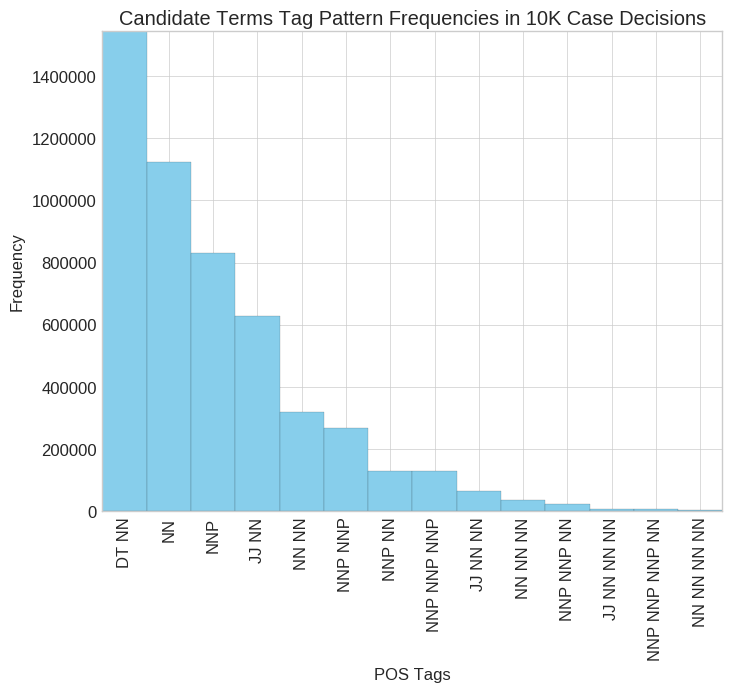

In [ ]:
fl_chunks=unNest(chunked_para)
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from operator import itemgetter
counts = Counter(tag for word , tag in fl_chunks)
counts=counts.items()
# print(counts)
counts = sorted(counts, key=itemgetter(1), reverse=True)
# print(counts)
labels, values  = zip(*counts)
indexes = np.arange(len(labels))
width =1

# print(list(map(lambda x:"{:,}".format(x),values)))

n=plt.bar(indexes, values, width, color='skyblue', edgecolor='black', align = 'center',linewidth=.1)
plt.xticks(indexes,labels)
plt.yscale('linear')
plt.title("Candidate Terms Tag Pattern Frequencies in 10K Case Decisions")
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xticks(rotation = 90)
plt.tight_layout
plt.axis('tight')
plt.margins(0.01, 0.01)
plt.style.use('seaborn-whitegrid')
# n.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.rcParams['figure.dpi'] = 100
plt.show()

### *(Not to Run) Table for POS patterns*

In [ ]:
import pandas as pd
cnt= 0
table=[]
for tag_patten, count in counts:
    for term, pattern in fl_chunks:
        if tag_patten == pattern:
            cnt+=1
            table.append((tag_patten, term, count))
            break
    continue
print(cnt)
pd.DataFrame(table)

In [ ]:
import pandas as pd
# df = pd.DataFrame(result)
dataset = 'genia'
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame.from_dict({(i,j): result_filter[dataset][i][j] 
                           for i in result_filter[dataset].keys() 
                           for j in result_filter[dataset][i].keys()},
                       orient='index')

### *(Not to Run) List term using a pattern*

In [ ]:
for term, pattern in fl_chunks:
    if pattern == 'NN JJ NN':
        print(term)
        break

## Generator to { tokenize [ data ] —>, tagger [ tokens ], chunker [ tagged text ] } CAP data for ATR

In [ ]:
def linguistic_filter(corpus_file):
    count= 0
    #Tokanize Data generator
    print('process started')
    tokenize_data_gen = tokenize_data(corpus_file)
    for tokenized_para, tokenized_name in tokenize_data_gen:

        #POS- Tagging
        tagged_para = tag_pos(tokenized_para,grouped=True)
        tagged_name = tag_pos(tokenized_name)

        #Chunking
        chunked_para=[term for term in map(list, chunker(tagged_para, grouped=True))]
        chunked_name=[term for term in chunker(tagged_name)]
        # if count%10000==0:
        yield chunked_para, chunked_name

## List Creation -  [Terminologies]

In [ ]:
import sys, os, time
length_para=0
obj_dir = '/content/gdrive/My Drive/Thesis/data/'
list_text_file = os.path.join(obj_dir, 'para_json.txt')
if not os.path.isfile(list_text_file):
    tm=start_time= time.time()
    linguistic_candidates_gen =  linguistic_filter(corpus_file)
    count=0
    terms_para=[]
    terms_name= []
    for para, name in linguistic_candidates_gen:
        terms_para.append(rem_specialchars(para))
        terms_name.append(name)
        length_para+=getSizeOfNestedList(para)
        count+=1
        # if count == 1000:  break
        if count%50 == 0: tm=(time.time()-start_time)/count
        eta = time.strftime("%H:%M:%S",time.gmtime(tm*(183146-count)))
        sys.stdout.write('\r'+'Progress:    '+'{:.1f}%'.format(count*100/183146)+'    Doccuments Processed: '+str(count)+'    Token Length: '+str(length_para)+'    ETA: '+str(eta))

    print('\nsaving Files')
    save_list(list_text_file,terms_para )
    # save_list(obj_dir+'para_name.txt',terms_name )
    print('Files saved sucessfully')
print('List files Available in the Drive')

# print('Loading from Drive')
terms_para = load_list(list_text_file)
# print('Done')

List files Available in the Drive


## Merge all sentence terms from each Doccument(Case Files)

In [ ]:
import itertools
import functools
import operator
def flattern(nested_list):
    def unNest(nested_list):
        ''' recursively flattern nested lists '''
        if not (any(isinstance(i, list) for i in nested_list)):
            return nested_list
        else:
            nested_list = functools.reduce(operator.iconcat, nested_list, [])
            return unNest(nested_list)

    unnested_list=unNest(nested_list)
    ln = list(set(unnested_list))
    return ln

def de_sent(nested_list):
    return [list(itertools.chain(*sub)) for sub in nested_list]

terms_para = flattern(terms_para)
# lt_terms_para=de_sent(terms_para)

## Statistics of Term Occurrences

### TF-IDF

In [ ]:
import itertools, time, sys, math
import numpy as np   
from collections import Counter

def create_term_freq(candidates):
    def unNest(nested_list):
        ''' recursively flattern nested lists '''
        if not (any(isinstance(i, list) for i in nested_list)):
            return nested_list
        else:
            nested_list = functools.reduce(operator.iconcat, nested_list, [])
            return unNest(nested_list)

    unnested_list=unNest(candidates)
    Counter(unnested_list)
    return dict(Counter(unnested_list))

def create_doc_freq(doc_list):
    df = {}
    N=len(doc_list)
    for i in range(N):
        tokens = doc_list[i]
        # tokens=list(map(lambda x:x.lower(), tokens))             #lower case conversion
        for w in tokens:
            try:
                data_text_file[w].add(i)
            except:
                df[w] = {i}
    for i in df:
        df[i] = len(df[i])
    return df

def get_doc_freq(word, df):
    c = 0
    try:
        c = df[word]
    except:
        pass
    return c

def calc_tf_idf(candidates, doc_len, df):
    tfidf={}
    words_count= len(candidates)                                    #Length of terms
    # lower_candidates = list(map(lambda x:x.lower(), candidates))    #lower case conversion
    set_candidates=set(candidates)                            #unique candidates 
    tf = create_term_freq(candidates)                         #term frequency
    for term in set_candidates:            
        term_freq = tf[term]/words_count
        doc_freq = get_doc_freq(term, df)
        idf = math.log((doc_len+1)/(doc_freq+1))            
        tfidf[term] = term_freq*idf
    return tfidf


def get_tf_idf(doc_list):
    tf_idf={}
    count=0
    doc_len= N=len(doc_list)
    df=create_doc_freq(doc_list)
    tm=start_time= time.time()
    tf = create_term_freq(doc_list)                         #term frequency
    for i in range(N):
        tf_idf[i]=calc_tf_idf(doc_list[i], N, df)
        count+=1
        if count%10 == 0: tm=(time.time()-start_time)/count
        eta = time.strftime("%H:%M:%S",time.gmtime(tm*(N-count)))
        sys.stdout.write('\r'+'Progress:    '+'{:.1f}%'.format(count*100/N)+'    Doccuments Processed: '+str(count)+'    ETA: '+str(eta))
    return tf_idf


def normalize_tfidf(percentage, chunks):
    # #Pre fetch TF-IDF
    terms = de_sent(chunks)
    tf_idf = get_tf_idf(terms)

    #normalize over all doccuments
    tf_idf_normalise={}
    tf_idf_count={}
    for idx, doc in tf_idf.items():
        for term, val in doc.items():
            try:
                tf_idf_normalise[term]+=val
                tf_idf_count[term]+=1
            except:
                tf_idf_normalise[term] = val
                tf_idf_count[term]=1
    for term, val in tf_idf_normalise.items():
        tf_idf_normalise[term] = val/tf_idf_count[term]
    terms = [(key, val) for key, val in (sorted(tf_idf_normalise.items(), key=lambda x:x[1], reverse=True)[:int(len(tf_idf_normalise) * percentage/100)])]
    return terms


#Pre fetch TF-IDF
# tf_idf = get_tf_idf(lt_terms_para)
n_tf_idf = normalize_tfidf(100, terms_para)
# df=create_doc_freq(lt_terms_para)
# N= len(lt_terms_para)
# tf_idf = calc_tf_idf(ft_terms_para,N, df)
# print('\n Process Completed')
# save_list('/content/gdrive/My Drive/ColabObjects/tf_idf_json.txt', cval)
# print('\n File Saved')

In [ ]:
import pandas as pd
df = pd.DataFrame(n_tf_idf[-30:])
df

### Residual IDF

In [ ]:
import math
import time
import sys
def calc_ridf(candidates, df, doc,tf_idf):
    ridf_val={}
    set_candidates = set(candidates)                                        #unique terms from doc
    # set_candidates=set(map(lambda x:x.lower(), st))             #lower case conversion 
    tf = create_term_freq(set_candidates)   #term frequency
    N= len(candidates)                                      #length of candidates
    for term in set_candidates:
        try:
            cand_freq = tf[term]#/N
            doc_freq = df[term]
            atf=cand_freq/doc_freq
            ridf_val[term]=tf_idf[doc][term]+math.log(1-math.exp(-atf))
        except:
            print('Error occured at: ',term,'   Doc No: ', doc  )
    return ridf_val

#get r-idf for all doccments
def get_ridf(doc_list,tf_idf):
    df=create_doc_freq(doc_list)
    count=0
    N=len(doc_list)
    r_idf={}
    tm=start_time= time.time()
    for i in range(N):
        r_idf[i] =calc_ridf(doc_list[i], df, i,tf_idf)
        count+=1
        if count%100 == 0: tm=(time.time()-start_time)/count
        eta = time.strftime("%H:%M:%S",time.gmtime(tm*(N-count)))
        sys.stdout.write('\r'+'Progress:    '+'{:.1f}%'.format(count*100/N)+'    Doccuments Processed: '+str(count)+'    ETA: '+str(eta))
    return r_idf

def normalize_ridf(percentage, chunks):
    # #Pre fetch TF-IDF
    terms = de_sent(chunks)
    tf_idf = get_tf_idf(terms)
    ridf = get_ridf(terms,tf_idf)

    #normalize over all doccuments
    ridf_normalise={}
    ridf_count={}
    for idx, doc in ridf.items():
        for term, val in doc.items():
            try:
                ridf_normalise[term]+=val
                ridf_count[term]+=1
            except:
                ridf_normalise[term] = val
                ridf_count[term]=1
    for term, val in ridf_normalise.items():
        ridf_normalise[term] = val/ridf_count[term]
    terms = [(key, val) for key, val in (sorted(ridf_normalise.items(), key=lambda x:x[1], reverse=True)[:int(len(ridf_normalise) * percentage/100)])]
    return terms

# r_idf = get_ridf(lt_terms_para)
n_r_idf= normalize_ridf(100, terms_para)
# print('\n Process ATF Completed')
# save_list('/content/gdrive/My Drive/ColabObjects/atf_json.txt', cval)
# print('\n File Saved')

Progress:    100.0%    Doccuments Processed: 1000    ETA: 00:00:00

In [ ]:
import pandas as pd
df = pd.DataFrame(n_r_idf[-30:])
df


### C-NC value

In [ ]:
def create_term_len(candidates):
    tl={}
    for word in candidates:
        tl[word] = len(word.split())    
    return tl

def n_grams(term,ln, set_candidates):
    words=term.split()
    subsets=[]
    for l in reversed(range(1, ln)):
        for k in range(ln-l+1): #k= 0, ln= 4
            subsets.append(' '.join(words[k:k+l]))
    subs= set(subsets)
    substrings=set()
    for word in subs:
        if word in set_candidates:
            substrings.add(word)
    return substrings

def nest_freq_count(candidates, tl, tf):
    nf={}
    cf={}
    N=len(candidates)
    for term in candidates:
        """ update subterms' count if they are part of nested term """
        substrings = n_grams(term, tl[term], candidates)
        if len(substrings)>1:
            for word in substrings:
                if word in nf:
                    nf[word] += tf[term]#/N
                    cf[word] +=1
                    #if word=='public': print(term, tf[term]); 
                else:
                    nf[word] = tf[term]#/N
                    cf[word] =1
                    #if word=='public': print(term, tf[term]) 
    return nf, cf

import numpy as np
def calc_cval(candidates, alpha=0.1):
    c_val={}
    N= len(candidates)
    #lower_candidates = list(map(lambda x:x.lower(), candidates))#lower case conversion
    set_candidates=set(candidates)                        #unique candidates 
    tf = create_term_freq(candidates)                     #term frequency
    tl = create_term_len(set_candidates)                        #term length
    nf, cf= nest_freq_count(set_candidates, tl, tf)             #nesting frequency
    for term in set_candidates:
        term_len = tl[term]
        term_freq = tf[term]#/N
        if term in nf:          #nested case
            c_val[term]=np.log2(term_len+alpha)*(term_freq-(nf[term]/cf[term]))            
        else:                   #not nested
            c_val[term]=np.log2(term_len+alpha)*term_freq
    return c_val

#get c-val for all doccments
def get_cval(doc_list):
    tm=start_time= time.time()
    count=0
    N=len(doc_list)
    cval={}
    for i in range(N):
        cval[i]=calc_cval(doc_list[i])
        count+=1
        if count%100 == 0: tm=(time.time()-start_time)/count
        eta = time.strftime("%H:%M:%S",time.gmtime(tm*(N-count)))
        sys.stdout.write('\r'+'Progress:    '+'{:.1f}%'.format(count*100/N)+'    Doccuments Processed: '+str(count)+'    ETA: '+str(eta))
    return cval


def cval_term_pct(percentage, chunks):
    ft_terms=unNest(chunks)
    cval= calc_cval(ft_terms)
    return [(key, val) for key, val in (sorted(cval.items(), key=lambda x:x[1], reverse=True)[:int(len(cval) * percentage/100)])]


c_value = cval_term_pct(100, terms_para)
#Pre fetch TF-IDF  
# cval= get_cval(terms_para)
# cval= calc_cval(ft_terms_para)
# print('\n Process Completed')
# save_list('/content/gdrive/My Drive/ColabObjects/c_val_json.txt', cval)
# print('\n File Saved')

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(c_value[:30])
df

### NC-Value

In [ ]:
import pandas as pd
def calc_ncval(chunks):
    #Doc as a Window
    de_sent_chunks=de_sent(chunks)
    from sklearn.feature_extraction.text import CountVectorizer
    count_model = CountVectorizer(tokenizer=lambda x:x, preprocessor=lambda x:x) # default unigram model
    X = count_model.fit_transform(de_sent_chunks)
    Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
    Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
    # print(Xc.todense()) # print out matrix in dense format
    df = pd.DataFrame.sparse.from_spmatrix(Xc,columns=count_model.vocabulary_,index=count_model.vocabulary_)

    ft_terms=unNest(chunks)
    cval= calc_cval(ft_terms)
    #Top 200 terms from NC - Value
    ctx_terms = sorted(cval.keys(), key=cval.get, reverse = True)[:200]
    weights = pd.Series(index=ctx_terms, data=np.count_nonzero(df.loc[ctx_terms], axis=1)/200)
    nc_val = df[ctx_terms].dot(weights)#.sort_values(ascending=False)
    c_nc_val={}
    for term in nc_val.keys():
        c_nc_val[term]=0.8*cval[term]+0.2*nc_val[term]
    return c_nc_val

def c_nc_val_term_pct(percentage, chunks):
    c_nc_val= calc_ncval(chunks)
    return sorted(c_nc_val, key=c_nc_val.get, reverse = True)[:int(len(c_nc_val)*percentage/100)]

# nc_terms= sorted(c_nc_val, key=c_nc_val.get, reverse = True)[:int(len(c_nc_val)*.5)]
c_nc_value = c_nc_val_term_pct(100, terms_para)

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(c_nc_value[-30:])
df

### ComboBasic

In [ ]:
def calc_combo_basic(candidates, alpha=0.75, beta= 0.1):
    c_b={}
    b={}
    set_candidates = set(candidates)                                        #unique terms from doc
    # set_candidates=set(map(lambda x:x.lower(), st))             #lower case conversion 
    tf = create_term_freq(candidates)   #term frequency
    tl = create_term_len(set_candidates)                               #term length
    nf, cf= nest_freq_count(set_candidates, tl, tf)             #nesting frequency
    for term in set_candidates:
        cand_superstr= 0
        if term in cf: cand_superstr = cf[term]
        cand_freq = tf[term]
        ln=tl[term]
        cand_substr = len(n_grams(term, ln, set_candidates))
        b[term] = ln*math.log(cand_freq) + (alpha*cand_superstr)
        c_b[term] = b[term] +  (beta*cand_substr)
    return c_b, b

#get combo-basic for all doccments
def get_combo_basic(doc_list):
    count=0
    N=len(doc_list)
    com_basic={}
    basic={}
    tm=start_time= time.time()
    for i in range(N):
        com_basic[i], basic[i] = calc_combo_basic(doc_list[i])
        count+=1
        if count%100 == 0: tm=(time.time()-start_time)/count
        eta = time.strftime("%H:%M:%S",time.gmtime(tm*(N-count)))
        sys.stdout.write('\r'+'Progress:    '+'{:.1f}%'.format(count*100/N)+'    Doccuments Processed: '+str(count)+'    ETA: '+str(eta))
    return com_basic, basic


def combo_basic_term_pct(percentage, chunks):
    flat_para = unNest(chunks)
    com_basic, basic = calc_combo_basic(flat_para)
    return [(key, val) for key, val in (sorted(com_basic.items(), key=lambda x:x[1], reverse=True)[:int(len(com_basic) * percentage/100)])]

combo_basic = combo_basic_term_pct(100, terms_para)

#com_basic, basic = get_combo_basic(terms_para)
# flat_para = flatter(terms_para)
# com_basic, basic = calc_combo_basic(ft_terms_para)
# print('\n Process ATF Completed')
# save_list('/content/gdrive/My Drive/ColabObjects/com_basic_json.txt', com_basic)
# print('\n File Saved')
# stop_words = set(stopwords.words('english'))
# flat_para = [word for word in flat_para if word ]#not in stop_words]
# com_basic, basic = calc_combo_basic(flat_para)

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
df = pd.DataFrame(combo_basic[-30:])
df

### Fast Text Traning 
Generate embeddings by training fasttext on the entire cap DataSet 

### Download CAP Data to text file -  For fastText Training

In [ ]:
import lzma, json, os
corpus_dir = '/content/gdrive/My Drive/Thesis/data/'
data_text_file = os.path.join(corpus_dir, 'illinois_vb.txt')
corpus_file = os.path.join(corpus_dir, 'Illinois-20200302-text/data/data.jsonl.xz')

def create_data(corpus_file):    
    with lzma.open(corpus_file) as in_file:
        for line in in_file:
            case = json.loads(str(line, 'utf8'))
            case_text =''
            for opinion in case['casebody']['data']['opinions']:
                case_text += opinion['text']
            case_name = (case['name'])
            yield case_text, case_name

def create_text_file(data_text_file):
    if not os.path.isfile(data_text_file):
        if not os.path.exists(corpus_dir):
            os.makedirs(corpus_dir)
        print('corpus file:', corpus_file)
        create_data_gen = create_data(corpus_file)
        with open(data_text_file, 'w+') as f:
            i=0
            for text, name in create_data_gen:
                i+=1
                f.write("%s\n" % name)
                f.write("%s\n" % text)
                if i==200000:
                    f.close()
                    break
            print('maxed out')
            f.close()
            print('File available at:',data_text_file)
    print('File not created as it Exists at:',data_text_file)

create_text_file(data_text_file)

corpus file: ./data/CAP/Illinois-20200302-text/data/data.jsonl.xz
maxed out
File available at: ./data/CAP/illinois_vb.txt


### Preprocess text file to Remove special chareters and stopwords

In [ ]:
import os, io, nltk, re, numpy as np
corpus_dir = '/content/gdrive/My Drive/Thesis/data/'
data_text_file = os.path.join(corpus_dir, 'illinois_vb.txt')

def rm_stop_words(data):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if  w.lower() not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

def rm_punctuation(data):
    #symbols ="!\"#$%&()*+/:;<=>?@[\]^_`”‘“—–‐-−,″{|}~"
    re.sub(r'\W+', ' ', data)
    return data

def open_text(file):
    with open(file, encoding='utf-8') as f:
        for line in f.readlines():
            yield line

def clean_text(dest_file):
    if not os.path.isfile(data_text_file):
        create_text_file(data_text_file)
    if not os.path.isfile(dest_file):
        open_text_gen= open_text(data_text_file)
        with open(dest_file, 'w+') as f:
            for line in open_text_gen:
                text = rm_punctuation(line)
                text = rm_stop_words(text)
                f.write("%s\n" % str(text))
            f.close()
            print('PreProcessed File Available at:', dest_file)

            
dest_file = os.path.join(corpus_dir,'illinois_prepros.txt')
data_text_file = os.path.join(corpus_dir, 'illinois_vb.txt')

### Install fastText using make

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip
%cd "fastText-0.9.2"
%pwd
!make
%cd ..
!rm "v0.9.2.zip"
%mkdir "data/models"
%pwd
print("Verify fastext install")
!./fastText-0.9.2/fasttext

## Install fastText using pip

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
!pip install -q fastText/.

Cloning into 'fastText'...
remote: Enumerating objects: 3840, done.
remote: Total 3840 (delta 0), reused 0 (delta 0), pack-reused 3840
Receiving objects: 100% (3840/3840), 8.21 MiB | 32.34 MiB/s, done.
Resolving deltas: 100% (2413/2413), done.


### Train FastText on the CAP text file and store data to gdrive

In [ ]:
!./fastText-0.9.2/fasttext skipgram -epoch 25 -input '/content/gdrive/My Drive/Thesis/data/illinois_vb.txt' -output '/content/gdrive/My Drive/EmbeddingModels/ft_model_25'

Read 350M words
Number of words:  457663
Number of labels: 0
Progress:  17.5% words/sec/thread:   10629 lr:  0.041261 avg.loss:  0.350837 ETA:  15h43m54s

### Download and Load  pre trained wikipedia fastText vectors 

In [ ]:
#!wget -P /content/data/cache https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
model_dir = './data/model/'
data_cache = './data/cache'
model_file = '/content/gdrive/My Drive/EmbeddingModels/wiki.en.100.bin'
if not os.path.isfile(model_file):
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_zip = 'wiki.en.zip'
    download_url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/' + model_zip 
    
    if not os.path.exists(data_cache):
        os.makedirs(data_cache)
    
    import shutil, requests

    zipfilepath = os.path.join(data_cache, model_zip)
    if not os.path.isfile( zipfilepath ):
        response = requests.get(download_url, stream=True)
        with open(zipfilepath, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
    import zipfile
    with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
        zip_ref.extractall(model_dir)
    # Get rid of zipfilepath source (the required text file itself will remain)
        os.unlink(zipfilepath)
print("Model available locally")

import fasttext
import fasttext.util
model = fasttext.load_model('/content/gdrive/My Drive/EmbeddingModels/wiki.en.100.bin')
fasttext.util.reduce_model(model, 100)
model.get_dimension()

In [ ]:
!wget -P /content/data/cache https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
!mkdir '/content/data/model/'
!unzip '/content/data/cache/wiki.en.zip' -d '/content/data/model/'
# !./fastText/reduce_model.py '/content/data/model/wiki.en.bin' 100

--2020-06-29 15:46:04--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10356881291 (9.6G) [application/zip]
Saving to: ‘/content/data/cache/wiki.en.zip’

wiki.en.zip         100%[===================>]   9.65G  21.1MB/s    in 7m 44s  

2020-06-29 15:53:49 (21.3 MB/s) - ‘/content/data/cache/wiki.en.zip’ saved [10356881291/10356881291]

Archive:  /content/data/cache/wiki.en.zip
  inflating: /content/data/model/wiki.en.vec  
  inflating: /content/data/model/wiki.en.bin  


In [ ]:
import fasttext
model = fasttext.load_model('/content/gdrive/My Drive/EmbeddingModels/wiki.en.100.bin')

In [ ]:
import fasttext.util
fasttext.util.reduce_model(model, 100)
print(model.get_dimension())
model.save_model('/content/data/model/wiki.en.100.bin')

100


## Load FastText trained Model

In [ ]:
import fasttext
model = fasttext.load_model('/content/gdrive/My Drive/EmbeddingModels/ft_model.bin')

## Flattern the list of Recognized Terms

In [ ]:
import functools
import operator

import numpy as np
import re
def rem_nonword(lst):
    pattern = re.compile(r'\W+')
    return [item for item in lst if pattern.match(item)] 

def flatter(nested_list):
    ''' recursively flattern nested lists '''
    if not (any(isinstance(i, list) for i in nested_list)):
        return nested_list
    else:
        nested_list = functools.reduce(operator.iconcat, nested_list, [])
        return flatter(nested_list)

terms_para=flatter(terms_para)
terms_para = list(set(terms_para))

## Get embeddings for the terms using fastText Model

### Using character n-grams

In [ ]:
import numpy as np
words_vec= np.array([model.get_word_vector(x) for x in terms_para])
idx_words= dict(enumerate(terms_para))
words_idx = dict(zip(idx_words.values(),idx_words.keys()))
words_vec.shape

(3652320, 100)

### By combining indiviual tokens

In [ ]:
words_vec= np.array([np.array([model.get_word_vector(w) for w in x.split()]).sum(axis =0) for x in terms_para ])
idx_words= dict(enumerate(terms_para))
words_idx = dict(zip(idx_words.values(),idx_words.keys()))
words_vec.shape

(3652320, 100)

## Cosine Similarity between vector and matrix

In [ ]:
def cosine_sim(A,B):
    return np.divide(B.dot(A),np.multiply(np.linalg.norm(A),np.linalg.norm(B, axis=1)))

### Function for semantically related Terms

In [ ]:
def get_similar_terms(term, N =30):
    if term not in words_idx.keys():
        ov_vec = model.get_word_vector(term)
        sim_mat = cosine_sim(ov_vec,words_vec)
    else:
        id= words_idx[term]
        sim_mat = cosine_sim(words_vec[id],words_vec)
    return [(idx_words[n], sim_mat[n]) for n in list(np.argsort(-1*sim_mat)[:N])]

## Interesting Findings

In [ ]:
get_similar_terms('india')

[('india rubber', 0.7100314),
 ('Dindia', 0.69413203),
 ('trichina', 0.6936052),
 ('beserk', 0.66912293),
 ('the dia', 0.6578055),
 ('contz-ol', 0.65780413),
 ('ex gratia', 0.65769255),
 ('gratia', 0.6544252),
 ('indietm nt', 0.6525573),
 ('intei%st', 0.6500038),
 ('muer', 0.6476711),
 ('strange fire', 0.63897234),
 ('cattie', 0.6373937),
 ('deus ex machina', 0.63727397),
 ('small iron vessel', 0.63667923),
 ('devsie', 0.6339826),
 ('sinca', 0.6317662),
 ('the mala', 0.6316062),
 ('another that.in', 0.6314395),
 ('coah', 0.63014907),
 ('mini van', 0.63005334),
 ('another arena', 0.62941366),
 ('indis', 0.62939316),
 ('part collie', 0.62935185),
 ('sugg', 0.62872505),
 ('the trichina', 0.6286613),
 ('couusel', 0.62812585),
 ('mere organ', 0.62652254),
 ('coopus', 0.62637657),
 ('another doggie', 0.62570506)]

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
df = pd.DataFrame(get_similar_terms('Narcotics'))
df

In [ ]:
get_similar_terms('Weapons')

[('Weapons', 1.0000001),
 ('Weapons Ban', 0.96883994),
 ('Weapons Rev', 0.9467993),
 ('Weapons Case', 0.9357501),
 ('Weapons Ill Rev', 0.9350341),
 ('Weapons Class', 0.9327926),
 ('Deadly Weapons act', 0.92427087),
 ('Weapon', 0.9236434),
 ('Deadly Weapons Act', 0.9185476),
 ('Weapons’', 0.9061108),
 ('Weapons A person', 0.88615143),
 ('Weapons Control Act', 0.8852203),
 ('Weapons Ban County', 0.88389504),
 ('Weapons Statute', 0.86911917),
 ('Weapons Firing Range', 0.86910546),
 ('Weapon Beyond', 0.8687451),
 ('Deadly Weapon Act', 0.8674438),
 ('Weapons statute', 0.86687773),
 ('Deadly Weapon act', 0.8657105),
 ('Deadly Weapon', 0.8620362),
 ('Weapon Against K.H', 0.86153305),
 ('Offense Charged Unlawful sale', 0.85028094),
 ('Weapons Rev Stats', 0.8499372),
 ('Weapons provision', 0.84285516),
 ('Weapons Dealer Control', 0.84263676),
 ('Weapons Into Evidence', 0.83959484),
 ('Unlawful Use', 0.8343645),
 ('Weapon Chapter', 0.8321867),
 ('Misdemeanor Unlawful Use', 0.82881457),
 ('Unlawf

## Terms Belonging to a Context
Get terms belonging to a subject of interest

Methodology used:
 

*   Get the hyponym information for query term from external knowledge source
*   Get word vectors for hyponyms all the query terms 


*   mean the word vectors and find the resultant of the similarity between the vector and terminologies
*   list related terms









In [ ]:
from nltk.corpus import wordnet as wn
import nltk
import numpy as np
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Get Embedding for wordnet words
wordnet_vec= np.array([model.get_word_vector(x) for x in wn.all_lemma_names()])
idx_wordnet= dict(enumerate(wn.all_lemma_names()))
wordnet_idx = dict(zip(idx_wordnet.values(),idx_wordnet.keys()))
wordnet_vec.shape

(147306, 100)

In [ ]:
def getLemmas(word):
    synonyms = []
    for syn in wn.synsets(word):
        # for l in syn.lemma_names():
        #     synonyms.append(l)
        for h in syn.hyponyms():
            for l in h.lemma_names():
                synonyms.append(l)
    return list(set(synonyms))

def get_hypo_vectors(word):
    hypo_list = getLemmas(word)
    if len(hypo_list) ==0:
        ov_vector = model.get_word_vector(word) 
        sim_mat = cosine_sim(ov_vector,wordnet_vec)
        hypo_vec = np.array(wordnet_vec[np.argsort(-1*sim_mat)[:10]].mean(axis=0)).reshape(100,-1).T
    else:
        hypo_vec= np.array([model.get_word_vector(x) for x in hypo_list])
    return hypo_vec

def get_contextual_terms(term, N =30):
    hypo_vec = get_hypo_vectors(term)
    sim_mat = cosine_sim(hypo_vec.mean(axis=0),words_vec )
    return [(idx_words[n], sim_mat[n]) for n in list(np.argsort(-1*sim_mat)[:N])]

In [ ]:
def getLemmas(word):
    synonyms = []
    for syn in wn.synsets(word):
        for h in syn.hypernyms():
            for l in h.lemma_names():
                synonyms.append(l)
    return list(set(synonyms))

In [ ]:
get_contextual_terms('Weapons')

[('suasion', 0.9265278),
 ('the suasion', 0.9158599),
 ('undue persuasion', 0.910677),
 ('mere persuasion', 0.9020379),
 ('no persuasion', 0.9002233),
 ('any persuasion', 0.90016466),
 ('persuasion', 0.8979848),
 ('the persuasion', 0.89773023),
 ('real persuasion', 0.89484096),
 ('all persuasion', 0.89434797),
 ('a persuasion', 0.89138794),
 ('some persuasion', 0.8899184),
 ('both persuasion', 0.8864234),
 ('term persuasion', 0.8829872),
 ('Mere persuasion', 0.8824194),
 ('pursuasion', 0.88240844),
 ('Such persuasion', 0.87335646),
 ('such suasion', 0.87126917),
 ('persuasion duress', 0.87090963),
 ('that persuasion', 0.8696506),
 ('such persuasion', 0.86923826),
 ('particular persuasion', 0.867236),
 ('further persuasion', 0.86627805),
 ('dissuasion', 0.86577505),
 ('persuasion ap', 0.86573917),
 ('simple persuasion', 0.86442035),
 ('strong persuasion', 0.8608404),
 ('persuasion force', 0.86059004),
 ('lawful persuasion', 0.85960597),
 ('fair persuasion', 0.8561483)]

In [ ]:
# get_contextual_terms('Weapons')
df = pd.DataFrame(get_contextual_terms('Weapons'))
df

In [ ]:
#Class for related terms search
import numpy as np
import functools
from functools import reduce
import operator
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet')

class Term2Vec:

    def __init__(self, name):
        self.name = name
        
    def fit(self, model, terms, tokenwise = False):
        def unNest(terms):
            ''' recursively flattern nested lists '''
            if not (any(isinstance(i, list) for i in terms)):
                return terms
            else:
                terms = functools.reduce(operator.iconcat, terms, [])
                return unNest(terms)
        self.model = model
        self.terms = list(set(unNest(terms)))
        if not tokenwise:
            self.term_vec= np.array([model.get_word_vector(x) for x in self.terms])
            self.idx_words= dict(enumerate(self.terms))
            self.words_idx = dict(zip(self.idx_words.values(),self.idx_words.keys()))
        else:
            self.term_vec = np.array([np.array([model.get_word_vector(w) for w in x.split()]).sum(axis =0) for x in self.terms])
        return self

    def get_vec(self, term):
        return self.term_vec[term]

    def cosine_sim(self, A,B):
        return np.divide(B.dot(A),np.multiply(np.linalg.norm(A),np.linalg.norm(B, axis=1)))  

    def get_similar_terms(self, term, N=10):
        if term not in self.words_idx.keys():
            ov_vec = self.model.get_word_vector(term)
            sim_mat = self.cosine_sim(ov_vec,self.term_vec)
        else:
            id= self.words_idx[term]
            sim_mat = self.cosine_sim(self.term_vec[id],self.term_vec)
        return [(self.idx_words[n], sim_mat[n]) for n in list(np.argsort(-1*sim_mat)[:N])]

    def get_contextual_terms(self, term, N=10):
        #Get Embedding for wordnet words
        wordnet_vec= np.array([self.model.get_word_vector(x) for x in wn.all_lemma_names()])
        idx_wordnet= dict(enumerate(wn.all_lemma_names()))
        wordnet_idx = dict(zip(idx_wordnet.values(),idx_wordnet.keys()))
        wordnet_vec.shape

        def getLemmas(word):
            synonyms = []
            for syn in wn.synsets(word):
                for h in syn.hyponyms():
                    for l in h.lemma_names():
                        synonyms.append(l)
            return list(set(synonyms))

        def get_hypo_vectors(self, word):
            hypo_list = getLemmas(word)
            if len(hypo_list) ==0:
                ov_vector = self.model.get_word_vector(word) 
                sim_mat = self.cosine_sim(ov_vector,wordnet_vec)
                hypo_vec = np.array(wordnet_vec[np.argsort(-1*sim_mat)[:10]].mean(axis=0)).reshape(100,-1).T
            else:
                hypo_vec= np.array([self.model.get_word_vector(x) for x in hypo_list])
            return hypo_vec

        hypo_vec = get_hypo_vectors(self, term)
        sim_mat = self.cosine_sim(hypo_vec.mean(axis=0),self.term_vec)
        return [(self.idx_words[n], sim_mat[n]) for n in list(np.argsort(-1*sim_mat)[:N])]

    def get_contextual_subjects(self,term,N=10):
        def getLemmas(word):
            synonyms = []
            for syn in wn.synsets(word):
                for h in syn.hypernyms():
                    for l in h.lemma_names():
                        synonyms.append(l)
            return list(set(synonyms))

        def get_hyper_vectors(self, word):
            hyper_list = getLemmas(word)
            hyper_vec= np.array([self.model.get_word_vector(x) for x in hyper_list])
            return hyper_vec
        
        hyper_vec = get_hyper_vectors(self, term)
        sim_mat = self.cosine_sim(hyper_vec.mean(axis=0),self.term_vec)
        return [(self.idx_words[n], sim_mat[n]) for n in list(np.argsort(-1*sim_mat)[:N])]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
illT2V = Term2Vec('illinois')

In [ ]:
mdl = illT2V.fit(model, terms_para)

In [ ]:
illT2V.get_contextual_terms('india')

[('india rubber', 0.8076974),
 ('beserk', 0.76184857),
 ('contz-ol', 0.76113075),
 ('other farm land nearer', 0.75545925),
 ('son lying', 0.75359654),
 ('mini van', 0.7524209),
 ('ex gratia', 0.7454772),
 ('mini van east', 0.74464554),
 ('natural mother’s breast', 0.74157065),
 ('gratia', 0.74116015)]

In [ ]:
illT2V.get_similar_terms('india')

[('india rubber', 0.7100314),
 ('Dindia', 0.69413203),
 ('trichina', 0.6936052),
 ('beserk', 0.66912293),
 ('the dia', 0.6578055),
 ('contz-ol', 0.65780413),
 ('ex gratia', 0.65769255),
 ('gratia', 0.6544252),
 ('indietm nt', 0.6525573),
 ('intei%st', 0.6500038)]